In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
import seaborn as sns
sns.set()

# import os
# print(os.listdir("../input"))


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# train_data = pd.read_csv("../input/train.csv")
train_data = pd.read_csv("drive/My Drive/Colab Notebooks/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# my_test_data = pd.read_csv("../input/test.csv")
test_data = pd.read_csv("drive/My Drive/Colab Notebooks/test.csv")
orig_test = test_data.copy()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
train_labels = train_data['Survived']
train_data.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)
test_data.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)

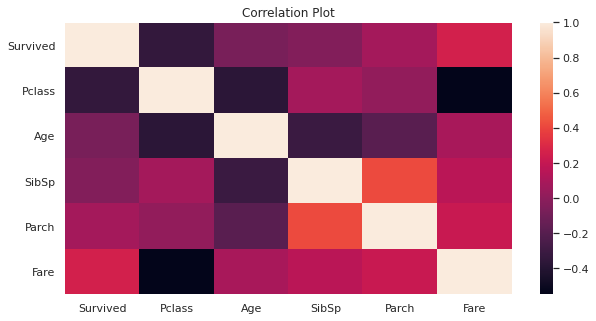

In [0]:
train_data1 = train_data.copy()
corr = train_data.corr()

sns.set(font_scale = 1)
plt.figure(figsize=(10, 5))

sns.heatmap(corr)
plt.title('Correlation Plot')
plt.show()

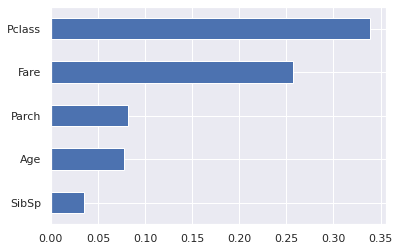

In [0]:
abs(corr).Survived.drop('Survived').sort_values().plot.barh()

In [0]:
dummy_fields = ['Pclass', 'Embarked']
for each in dummy_fields:
    dummies = pd.get_dummies(train_data[each], prefix=each, drop_first=False)
    train_data = pd.concat([train_data, dummies], axis=1)

for each in dummy_fields:
    dummies = pd.get_dummies(test_data[each], prefix=each, drop_first=False)    
    test_data = pd.concat([test_data, dummies], axis=1)

fields_to_drop = ['Pclass', 'Embarked','Survived']
train_data.drop(fields_to_drop, axis=1,inplace=True)
test_data.drop(fields_to_drop[:2], axis=1,inplace=True)

print('train_info\n')
train_data.info()
print('\n\ntest_info')
test_data.info()

train_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         891 non-null    object 
 1   Age         714 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Cabin       204 non-null    object 
 6   Pclass_1    891 non-null    uint8  
 7   Pclass_2    891 non-null    uint8  
 8   Pclass_3    891 non-null    uint8  
 9   Embarked_C  891 non-null    uint8  
 10  Embarked_Q  891 non-null    uint8  
 11  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(2), object(2), uint8(6)
memory usage: 47.1+ KB


test_info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         418 non-null    obje

In [0]:
train_data.drop(['Cabin'],axis=1,inplace=True)
train_data.replace(to_replace="female", value=1, inplace=True)
train_data.replace(to_replace="male", value=0, inplace=True)
train_data['Age'].fillna(train_data.Age.mean(),inplace=True)

test_data.drop(['Cabin'],axis=1,inplace=True)
test_data.replace(to_replace="female", value=1, inplace=True)
test_data.replace(to_replace="male", value=0, inplace=True)
test_data['Age'].fillna(test_data.Age.mean(),inplace=True)
test_data['Fare'].fillna(test_data.Fare.mean(),inplace=True)

train_data_nonorm = train_data.copy()

In [0]:
from sklearn.preprocessing import MinMaxScaler
train_data[:] = MinMaxScaler().fit_transform(train_data[:])
test_data[:] = MinMaxScaler().fit_transform(test_data[:]) 

In [0]:
print('\ntrain_head')
train_data.head()


train_head


,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.434531,0.125,0.0,0.103644,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0


In [0]:
print('\ntest_head')
test_data.head()


test_head


,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.452723,0.000,0.000000,0.015282,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.617566,0.125,0.000000,0.013663,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.815377,0.000,0.000000,0.018909,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.353818,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.287881,0.125,0.111111,0.023984,0.0,0.0,1.0,0.0,0.0,1.0


In [0]:
train_X,test_X,train_y,test_y = train_test_split(train_data,train_labels,test_size = 0.2,random_state=1)
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 301 to 37
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         712 non-null    float64
 1   Age         712 non-null    float64
 2   SibSp       712 non-null    float64
 3   Parch       712 non-null    float64
 4   Fare        712 non-null    float64
 5   Pclass_1    712 non-null    float64
 6   Pclass_2    712 non-null    float64
 7   Pclass_3    712 non-null    float64
 8   Embarked_C  712 non-null    float64
 9   Embarked_Q  712 non-null    float64
 10  Embarked_S  712 non-null    float64
dtypes: float64(11)
memory usage: 66.8 KB


In [0]:
train_X.describe()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.349719,0.372603,0.061798,0.061798,0.062365,0.244382,0.210674,0.544944,0.186798,0.089888,0.720506
std,0.477216,0.166728,0.126310,0.129328,0.090399,0.430022,0.408074,0.498326,0.390023,0.286222,0.449066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.271174,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.367921,0.000000,0.000000,0.028221,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.447097,0.125000,0.000000,0.059914,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# Neural network
act = 'relu'
model = Sequential()

model.add(Dense(16, input_dim=11, activation=act))
model.add(BatchNormalization())

model.add(Dense(16, activation=act))
model.add(BatchNormalization())

model.add(Dense(16, activation=act))
model.add(BatchNormalization())

model.add(Dense(8, activation=act))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

from keras.optimizers import SGD,Adam
opt = Adam(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

model.summary()
history = model.fit(train_X,train_y,epochs=300,batch_size=32)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                192       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
batch_normalization_3 (Batch (None, 16)                64        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                

In [0]:
test_y_pred = model.predict(test_X)
test_y_pred = np.round(test_y_pred)
mae = mean_absolute_error(test_y,test_y_pred)

print("Mean absolute error is : {}".format(mae))
a = accuracy_score(test_y,test_y_pred)
print("Accuracy score is : {} ".format(a))

Mean absolute error is : 0.2011173184357542
Accuracy score is : 0.7988826815642458 


In [0]:
# Using XGboost 
model1 = XGBRegressor(n_estimates = 1000,learning_rate=0.1)
model1.fit(train_X,train_y)
y_pred1 = model1.predict(test_X)
y_pred1 = np.round(y_pred1)

print("With XGBoost")
mae = mean_absolute_error(test_y,y_pred1)
print("Mean absolute error is : {}".format(mae))
a = accuracy_score(test_y,y_pred1)
print("Accuracy score is : {} ".format(a))

[14:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
With XGBoost
Mean absolute error is : 0.2122905027932961
Accuracy score is : 0.7877094972067039 


In [0]:
#Using RandomForestRegressor
model2 = RandomForestRegressor(random_state=1)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)
y_pred2 = np.round(y_pred2)

print("With RandomForestRegressor")
mae = mean_absolute_error(test_y,y_pred2)
print("Mean absolute error is : {}".format(mae))
a = accuracy_score(test_y,y_pred2)
print("Accuracy score is : {} ".format(a))

With RandomForestRegressor
Mean absolute error is : 0.2122905027932961
Accuracy score is : 0.7877094972067039 


In [0]:
#Using DecisionTreeRegressor 
model3 = DecisionTreeRegressor(random_state=1,)
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)
y_pred3 = np.round(y_pred3)

print("With DecisionTreeeRegressor")
mae = mean_absolute_error(test_y,y_pred3)
print("Mean absolute error is : {}".format(mae))
a = accuracy_score(test_y,y_pred3)
print("Accuracy score is : {} ".format(a))


In [0]:
predictions = model.predict(test_data)
predictions = np.round(predictions)
predictions = predictions.astype(int)
predictions = predictions.ravel()

### sending predictions to csv file

In [0]:
submission = pd.DataFrame({
    "PassengerId" : orig_test['PassengerId'],
    "Survived" : predictions
})
submission.to_csv('drive/My Drive/Colab Notebooks/titanic_pred.csv',index=False)